In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import joblib

from sklearn.utils import shuffle
sys.path.append( os.getcwd()+'/modules' )
import aux_functions

In [2]:
#Loading datasets
path = os.getcwd() 
os.chdir( "/home/toful/Documents/DataSets/cresci-2017.csv/datasets_full.csv/" )

real = pd.read_csv( 'genuine_accounts.csv/genuine_accounts.csv/users.csv' )
real = real.fillna( '' )
real['knownbot'] = 0

fakeFollowers = pd.read_csv('fake_followers.csv/fake_followers.csv/users.csv', na_filter=False)
fakeFollowers = fakeFollowers.fillna( '' )
fakeFollowers['knownbot'] = 1

socialSpamBots1 = pd.read_csv('social_spambots_1.csv/social_spambots_1.csv/users.csv', na_filter=False)
socialSpamBots1 = socialSpamBots1.fillna( '' )
socialSpamBots1['knownbot'] = 1

socialSpamBots2 = pd.read_csv('social_spambots_2.csv/social_spambots_2.csv/users.csv', na_filter=False)
socialSpamBots2 = socialSpamBots2.fillna( '' )
socialSpamBots2['knownbot'] = 1

socialSpamBots3 = pd.read_csv('social_spambots_3.csv/social_spambots_3.csv/users.csv', na_filter=False)
socialSpamBots3 = socialSpamBots3.fillna( '' )
socialSpamBots3['knownbot'] = 1

df_list = []

df_list += [ shuffle( pd.concat( [ real, fakeFollowers ], sort=False ) ) ]
df_list += [ shuffle( pd.concat( [ real, socialSpamBots1, socialSpamBots2, socialSpamBots3 ], sort=False ) ) ]
df_list += [ shuffle( pd.concat( [ real, fakeFollowers, socialSpamBots1, socialSpamBots2, socialSpamBots3 ], sort=False ) ) ]

fakeFollowers['knownbot'] = 2
df_list += [ shuffle( pd.concat( [ real, fakeFollowers, socialSpamBots1, socialSpamBots2, socialSpamBots3 ], sort=False ) ) ]
#df = shuffle( df )
#print df.head()
#print df.info()

os.chdir( path )


In [3]:
print( os.getcwd()  )

/home/toful/Dropbox/Uni/5e_Curs/TFG_II/BotDetector/src


In [4]:
#Building the working datasets
score_list = []
for df in df_list:
    score = pd.DataFrame()
    score['id'] = df['id']

    score['lang-en'] = df.apply( lambda row: aux_functions.language (row), axis=1 )
    score['profile_pic'] = df.apply( lambda row: aux_functions.profile_image (row), axis=1 ) #check this feature
    score['def_profile_pic'] = df.apply( lambda row: aux_functions.def_profile_image (row), axis=1 )
    score['has_screen_name'] = df.apply( lambda row: aux_functions.screen_name (row), axis=1 )
    score['30followers'] = df.apply( lambda row: aux_functions.min_followers (row, 30), axis=1 )
    score['1000friends'] = df.apply( lambda row: aux_functions.min_friends (row, 1000), axis=1 )
    score['twice_num_followers'] = df.apply( lambda row: aux_functions.ratio_followers (row), axis=1 )
    score['fifty_FriendsFollowersRatio'] = df.apply( lambda row: aux_functions.ratio_followers2 (row, 50), axis=1 )
    score['hundred_FriendsFollowersRatio'] = df.apply( lambda row: aux_functions.ratio_followers2 (row, 100), axis=1 )
    score['geoloc'] = df.apply( lambda row: aux_functions.location (row), axis=1 )
    score['banner_link'] = df.apply( lambda row: aux_functions.profile_banner (row), axis=1 )
    score['50tweets'] = df.apply( lambda row: aux_functions.tweets_written (row, 50), axis=1 )
    score['20statuses'] = df.apply( lambda row: aux_functions.min_statuses (row, 20), axis=1 )
    score['NeverTweeted'] = df.apply( lambda row: aux_functions.never_tweeted (row ), axis=1 )
    score['has_description'] = df.apply( lambda row: aux_functions.description (row), axis=1 )
    score['knownbot'] = df.apply( lambda row: aux_functions.knownbot (row), axis=1 )

    print score.shape
    print score.describe()
    print score.columns.values
    score_list += [ score ]
    #score

(6825, 17)
                 id      lang-en  profile_pic  def_profile_pic  \
count  6.825000e+03  6825.000000       6825.0      6825.000000   
mean   8.499737e+08     0.898022          0.0         0.002784   
std    7.662248e+08     0.302642          0.0         0.052693   
min    6.780330e+05     0.000000          0.0         0.000000   
25%    2.597067e+08     1.000000          0.0         0.000000   
50%    6.168972e+08     1.000000          0.0         0.000000   
75%    1.174963e+09     1.000000          0.0         0.000000   
max    3.164942e+09     1.000000          0.0         1.000000   

       has_screen_name  30followers  1000friends  twice_num_followers  \
count      6825.000000  6825.000000  6825.000000          6825.000000   
mean          0.000147     0.492601     0.076337             0.588425   
std           0.012105     0.499982     0.265556             0.492155   
min           0.000000     0.000000     0.000000             0.000000   
25%           0.000000     0.

(11737, 17)
                 id       lang-en  profile_pic  def_profile_pic  \
count  1.173700e+04  11737.000000      11737.0     11737.000000   
mean   1.263988e+09      0.863509          0.0         0.005623   
std    9.364116e+08      0.343324          0.0         0.074780   
min    6.780330e+05      0.000000          0.0         0.000000   
25%    4.662568e+08      1.000000          0.0         0.000000   
50%    1.127956e+09      1.000000          0.0         0.000000   
75%    2.357009e+09      1.000000          0.0         0.000000   
max    3.164942e+09      1.000000          0.0         1.000000   

       has_screen_name   30followers   1000friends  twice_num_followers  \
count     11737.000000  11737.000000  11737.000000         11737.000000   
mean          0.000085      0.611741      0.108631             0.655789   
std           0.009230      0.487375      0.311189             0.475130   
min           0.000000      0.000000      0.000000             0.000000   
25%      

# Data Analisis

In [5]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt

In [6]:
#Preparing the X and Y values for the machine learning analisis
yy=[]
XX=[]
for score in score_list:
    if 'knownbot' in score:
        y = score['knownbot'].values # get the labels we want
        X = score
        del X['knownbot']
        del X['id']
        X = X.values # use everything else to predict
        yy += [y]
        XX += [X]

In [27]:
for elem in score_list[0].columns.values:
    print elem

lang-en
profile_pic
def_profile_pic
has_screen_name
30followers
1000friends
twice_num_followers
fifty_FriendsFollowersRatio
hundred_FriendsFollowersRatio
geoloc
banner_link
50tweets
20statuses
NeverTweeted
has_description


# RF analysis

In [7]:
def train_model( X, y, name ):
    num_cv_iterations = 3
    num_instances = len(y)
    cv_object = ShuffleSplit( n_splits=num_cv_iterations, test_size = 0.2 )

    # first we create a reusable logisitic regression and random forest objects
    lr_clf = LogisticRegression( penalty='l2', C=1.0, class_weight=None ) # get object
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

    iter_num=0
    # the indices are the rows used for training and testing in each iteration
    for train_indices, test_indices in cv_object.split( X, y ):
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

        # train the reusable logisitc regression model on the training data
        #lr_clf.fit( X_train, y_train ) # train object
        #y_pred = lr_clf.predict( X_test ) # get test set precitions

        rf_clf.fit( X_train, y_train ) # train object
        y_pred = rf_clf.predict( X_test ) # get test set precitions
        acc = mt.accuracy_score( y_test, y_pred )
        cmat = mt.confusion_matrix( y_test, y_pred )
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        print "\n====Iteration",iter_num," ===="
        print "RANDOM FOREST"        
        print( mt.classification_report( y_test, y_pred ) )
        print "Accuracy Rate: ", acc
        print('Misclassification Rate: {}'.format( np.divide(np.sum( [ float(cmat[0,1]), float(cmat[1,0]) ] ), np.sum(cmat) ) ) )
        print('\nTP - True Negative {}'.format(cmat[0,0]))
        print('FP - False Positive {}'.format(cmat[0,1]))
        print('FN - False Negative {}'.format(cmat[1,0]))
        print('TP - True Positive {}'.format(cmat[1,1]))
        
        iter_num+=1
    # save the model to disk
    if not os.path.exists( 'models' ):
        os.makedirs( 'models' )
    str_ = 'models/randomForest_' + name + '_model.sav'
    print( "Saving the model into the disk\n" )
    joblib.dump( rf_clf, str_ )

In [8]:
names = [ 'fakeFollowers', 'spamBots', 'mix' ]
for i in range( len( names ) ):
    print( "Creating a model to detect:" + names[i] )
    train_model( XX[i], yy[i], names[i] )

Creating a model to detect:fakeFollowers

====Iteration 0  ====
RANDOM FOREST
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       677
           1       0.97      0.97      0.97       688

   micro avg       0.97      0.97      0.97      1365
   macro avg       0.97      0.97      0.97      1365
weighted avg       0.97      0.97      0.97      1365

Accuracy Rate:  0.96996336996337
Misclassification Rate: 0.0300366300366

TP - True Negative 659
FP - False Positive 18
FN - False Negative 23
TP - True Positive 665

====Iteration 1  ====
RANDOM FOREST
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       711
           1       0.96      0.97      0.97       654

   micro avg       0.97      0.97      0.97      1365
   macro avg       0.97      0.97      0.97      1365
weighted avg       0.97      0.97      0.97      1365

Accuracy Rate:  0.967032967032967
Misclassification Rate: 0.03296

# KNN analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
def knn_nneighbors_analysis( X, y ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    error_rate = []

    for i in range(1,40):
        knn = KNeighborsClassifier( n_neighbors = i )
        knn.fit( X_train, y_train )
        y_pred = knn.predict( X_test )
        error_rate.append( np.mean( y_pred != y_test) )
    
    plt.figure(figsize=(10,4))
    plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K-Values')
    plt.xlabel('K-Values')
    plt.ylabel('Error Rate')

In [11]:
def knn_analysis( X, y, neighbors ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    knn = KNeighborsClassifier( n_neighbors=neighbors )
    knn.fit( X_train, y_train )
    y_pred = knn.predict( X_test )
    acc = mt.accuracy_score( y_test, y_pred )
    cmat = mt.confusion_matrix( y_test, y_pred )
    print( mt.classification_report( y_test, y_pred ) )
    print "Accuracy Rate: ", acc
    print('Misclassification Rate: {}'.format( np.divide(np.sum( [ float(cmat[0,1]), float(cmat[1,0]) ] ), np.sum(cmat) ) ) )
    print('\nTP - True Negative {}'.format(cmat[0,0]))
    print('FP - False Positive {}'.format(cmat[0,1]))
    print('FN - False Negative {}'.format(cmat[1,0]))
    print('TP - True Positive {}'.format(cmat[1,1]))

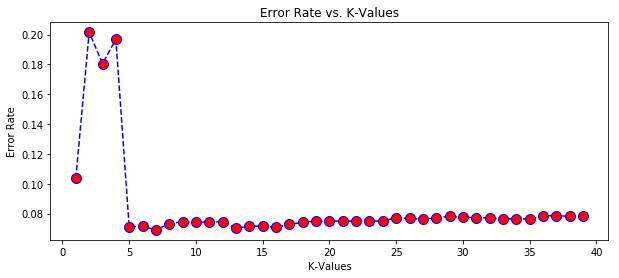

In [14]:
knn_nneighbors_analysis( XX[3], yy[3] )

In [15]:
knn_analysis( XX[3], yy[3], 5 )

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2004
           1       0.89      0.95      0.92      1518

   micro avg       0.93      0.93      0.93      3522
   macro avg       0.93      0.93      0.93      3522
weighted avg       0.93      0.93      0.93      3522

Accuracy Rate:  0.9290176036342986
Misclassification Rate: 0.0709823963657

TP - True Negative 1826
FP - False Positive 178
FN - False Negative 72
TP - True Positive 1446


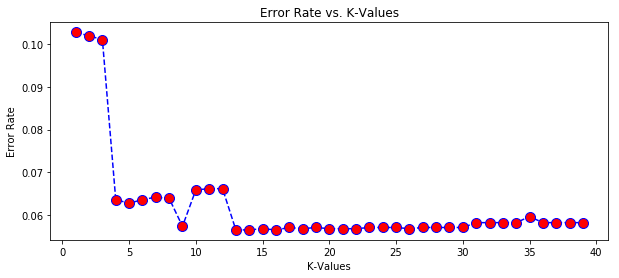

In [17]:
knn_nneighbors_analysis( XX[2], yy[2] )

In [18]:
knn_analysis( XX[2], yy[2], 9 )

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1046
           1       0.95      0.96      0.96      2476

   micro avg       0.94      0.94      0.94      3522
   macro avg       0.93      0.93      0.93      3522
weighted avg       0.94      0.94      0.94      3522

Accuracy Rate:  0.9426462237365133
Misclassification Rate: 0.0573537762635

TP - True Negative 932
FP - False Positive 114
FN - False Negative 88
TP - True Positive 2388


# Clustering analysis

In [19]:
from sklearn.cluster import KMeans

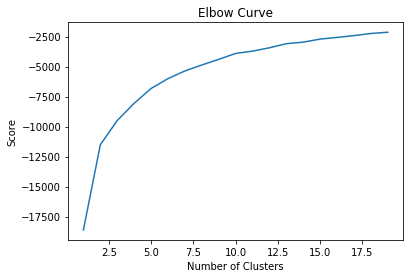

In [20]:
X = XX[3]
Nc = range(1, 20)
kmeans = [ KMeans( n_clusters=i ) for i in Nc ]
score = [ kmeans[i].fit(X).score(X) for i in range(len(kmeans)) ]
plt.plot( Nc,score )
plt.xlabel( 'Number of Clusters' )
plt.ylabel( 'Score' )
plt.title( 'Elbow Curve' )
plt.show()

In [21]:
X = XX[3]
kmeans = KMeans( n_clusters=5 ).fit( X )
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.05733186e-01  0.00000000e+00  4.41014333e-03  4.47233396e-19
   1.00000000e+00  1.21278942e-02  6.59316428e-01  1.00000000e+00
   7.77287762e-01  9.58103638e-01  1.00000000e+00  6.96802646e-01
   5.02756340e-01  1.37816979e-01  5.43550165e-01]
 [ 8.03084488e-01  0.00000000e+00  1.34108181e-03  2.23513634e-04
   2.90567725e-02  2.79615557e-01  1.77022798e-01  4.08006962e-15
   1.73472348e-16  5.17881091e-01  9.47250782e-01  1.11756817e-03
   2.23513634e-04 -6.47051857e-16  6.54894949e-02]
 [ 9.64920273e-01  0.00000000e+00  4.55580866e-04 -1.47722546e-18
   9.88154897e-01  4.55580866e-04  9.89521640e-01  1.82232346e-02
   1.73472348e-16  9.80865604e-01  9.92710706e-01  8.24145786e-01
   2.57403189e-01  9.11161731e-04  1.42108547e-14]
 [ 9.84105960e-01  0.00000000e+00  1.41280353e-02 -1.70761842e-18
   9.30684327e-01  4.41501104e-03  9.91611479e-01  6.18101545e-03
   1.73472348e-16  9.72626932e-01  9.79690949e-01  1.11022302e-14
   5.21804822e-15 -5.16947596e-16  1.00000000e+00]
 [ 9

# Neural Network analysis

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

In [ ]:
#Setting up the model layers
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/tutorials/keras/basic_classification

model = keras.Sequential( [ keras.layers.Dense( 32, input_shape=( len(X[0]), ) ),
                            keras.layers.Dense( 40, activation = tf.nn.sigmoid ),
                            keras.layers.Dense( 10, activation = tf.nn.sigmoid ),
                            keras.layers.Dense( 2, activation = tf.nn.softmax ) ] )

#the optimazer has to minimize the loss function

#Compiling the model
  #Loss function — This measures how accurate the model is during training. We want to minimize 
                   #this function to "steer" the model in the right direction.
  #Optimizer — This is how the model is updated based on the data it sees and its loss function.
  #Metrics —  Used to monitor the training and testing steps. The following example uses accuracy,
              #the fraction of the images that are correctly classified.
model.compile( optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mean_squared_error', metrics = ['accuracy'] )
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_cv_iterations = 1
cv_object = ShuffleSplit( n_splits=num_cv_iterations, test_size = 0.2 )
iter_num = 1

for train_indices, test_indices in cv_object.split( X, y ):
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    print "\n\n====Iteration",iter_num," ===="
    
    model.fit( X_train, y_train, epochs=1000 )
    test_loss, test_acc = model.evaluate( X_test, y_test )
    y_pred = model.predict( X_test )
    aux=[]
    for i in range( len( y_pred ) ):
        aux += [ np.argmax( y_pred[i] ) ]
    conf = mt.confusion_matrix( y_test, aux )
    
    print '\nMODEL RESULTS\n\tTest accuracy: ', test_acc, 'Test loss: ', test_loss
    print "PREDICTION RESULTS"
    print "confusion matrix\n", conf
    tp = float( conf[1][1] )
    fp = float( conf[0][1] )
    fn = float( conf[1][0] )
    try:  
        precission = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2*precission*recall/(precission+recall)
    except ArithmeticError:  
        print ("Arithmetic exception raised." )
    else: 
        print "\tF1: ", f1, "\tPrecission: ", precission, "\tRecall: ", recall
    iter_num+=1

#print y_pred